### Exercise 6.5

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import sklearn
from sklearn.preprocessing import StandardScaler # For standardizing features we will use Standardscaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path=r"C:\Users\acisk\Dropbox\My PC (DESKTOP-SO8P63N)\Desktop\Data Analytics\Achievement 6 Project- Advanced Analytics & Dashboard Design"

In [4]:
#Importing players data
fifa_21= pd.read_csv(os.path.join(path, 'FIFA 21 Ratings Project','Data', 'Prepared Data', 'FIFA21_ratings.csv'), index_col = False)

In [5]:
fifa_21.head()

,Unnamed: 0,sofifa_id,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,player_rating,...,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,team_jersey_number,contract_valid_until
0,0,158023,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,...,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,CAM,10.0,2021.0
1,1,20801,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,...,220000,"ST, LW",Right,5,4,5,High/Low,LS,7.0,2022.0
2,2,200389,27,188,87,Slovenia,Atl��tico Ma,Spain Primera Division,1.0,91,...,125000,GK,Right,3,3,1,Medium/Medium,GK,13.0,2023.0
3,3,188545,31,184,80,Poland,FC Bayern M��n,German 1. Bundesliga,1.0,91,...,240000,ST,Right,4,4,4,High/Medium,ST,9.0,2023.0
4,4,190871,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,...,270000,"LW, CAM",Right,5,5,5,High/Medium,LW,10.0,2022.0


#### Data Cleaning

In [6]:
fifa_21.columns

Index(['Unnamed: 0', 'sofifa_id', 'age', 'height_cm', 'weight_kg',
       'nationality', 'club_name', 'league_name', 'league_rank',
       'player_rating', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'team_position', 'team_jersey_number',
       'contract_valid_until'],
      dtype='object')

In [7]:
# Dropping the categorical and unneeded columns
fifa_21_new= fifa_21[['sofifa_id', 'age', 'height_cm', 'weight_kg', 'player_rating', 'value_eur',
       'wage_eur',]]

In [8]:
fifa_21_new.shape

(18719, 7)

In [10]:
# Renaming the columns 

fifa_21_new.rename(columns = {'sofifa_id' : 'Player ID', 'age' : 'Age', 'value_eur': 'Market Value EUR',
       'wage_eur' : 'Wages EUR'}, inplace = True)

C:\Users\acisk\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
fifa_21_new.head()

,Player ID,Age,height_cm,weight_kg,player_rating,Market Value EUR,Wages EUR
0,158023,33,170,72,93,67500000,560000
1,20801,35,187,83,92,46000000,220000
2,200389,27,188,87,91,75000000,125000
3,188545,31,184,80,91,80000000,240000
4,190871,28,175,68,91,90000000,270000


#### Standardize data

In [33]:
scaler = StandardScaler()
fifa_21_std = scaler.fit_transform(fifa_21_new)

In [41]:
fifa_21_std

array([[-2.50760295,  1.67067701, -1.64099567, ..., 12.72629844,
        27.911483  ,  0.33050232],
       [-7.55398312,  2.09783926,  0.8520107 , ...,  8.53285877,
        10.69529609,  0.33050232],
       [-0.94958061,  0.38919025,  0.99865813, ..., 14.18912623,
         5.88489093,  0.33050232],
       ...,
       [ 0.91124955, -1.10587764,  0.55871583, ..., -0.43232515,
        -0.39395371, -1.10458765],
       [ 1.15793826, -0.46513426,  0.70536327, ..., -0.43134993,
        -0.39395371, -1.10458765],
       [ 1.16672756,  0.60277137,  0.55871583, ..., -0.43330037,
        -0.34331787, -1.10458765]])

### 2. The elbow technique

In [44]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [45]:
score = [kmeans[i].fit(fifa_21_std).score(fifa_21_std) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-149751.99999999968,
 -102511.0935794755,
 -84960.25791382513,
 -68430.21134978981,
 -58508.865171841935,
 -53426.86168920764,
 -49147.61006636867,
 -46294.788553371705,
 -43723.79607839009]

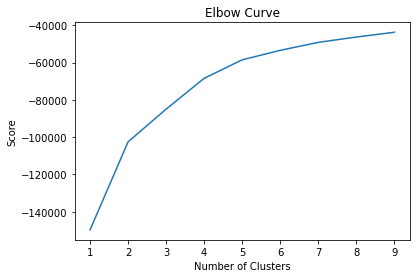

In [46]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I can see 4 breaking point of the curve, on the x-axis, it jump from 2 to 4 then from 4 to 5, it then rises slightly after 5.

###  4. k-means clustering

In [47]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [48]:
# Fit the k-means object to the data.

kmeans.fit(fifa_21_std)

C:\Users\acisk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [50]:
fifa_21_new['clusters'] = kmeans.fit_predict(fifa_21_std)

C:\Users\acisk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-50-8623f4f80ac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_21_new['clusters'] = kmeans.fit_predict(fifa_21_std)


In [51]:
fifa_21_new.head()

,Player ID,Age,height_cm,weight_kg,player_rating,Market Value EUR,Wages EUR,clusters
0,158023,33,170,72,93,67500000,560000,3
1,20801,35,187,83,92,46000000,220000,3
2,200389,27,188,87,91,75000000,125000,3
3,188545,31,184,80,91,80000000,240000,3
4,190871,28,175,68,91,90000000,270000,3


In [52]:
fifa_21_new['clusters'].value_counts()

0    6522
1    6399
2    5362
3     436
Name: clusters, dtype: int64

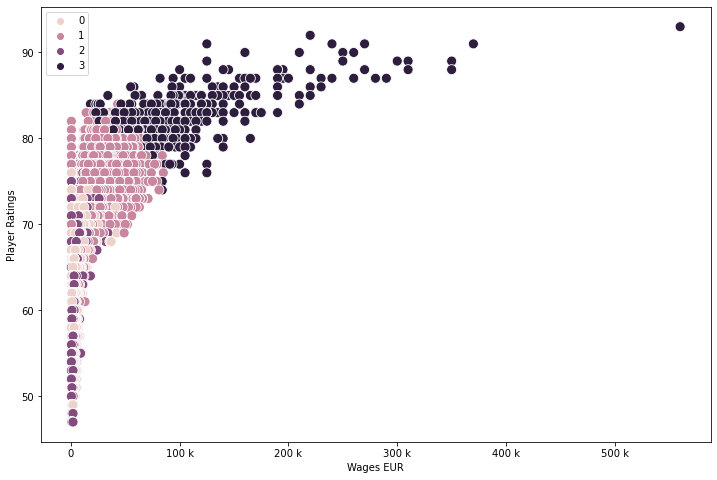

In [69]:
# Plot the clusters for the "player_rating" and "Wages" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=fifa_21_new['Wages EUR'], y=fifa_21_new['player_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Wages EUR') # Label x-axis.
plt.ylabel('Player Ratings') # Label y-axis.
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

#### There are more purple cluster( coded 1) players that receives wages below 100,000 , only the black cluster (coded 3)players receive wages over 100,000 they also receive the highest ratings.

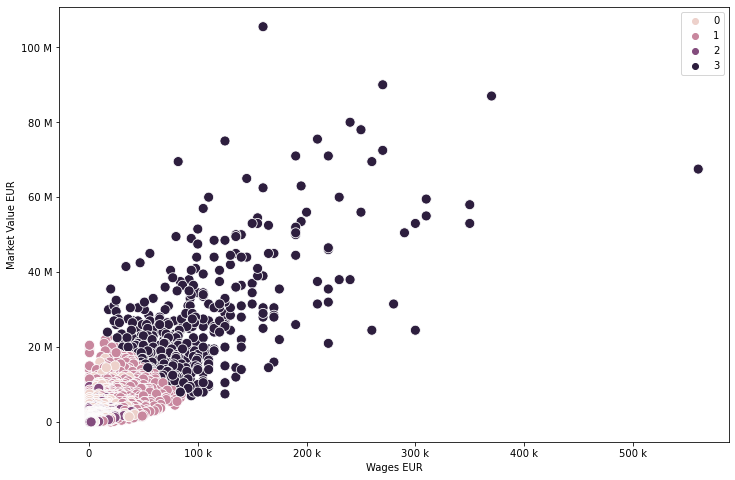

In [68]:
# Plot the clusters for the "Wages EUR" and "Market Value EUR" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=fifa_21_new['Wages EUR'], y=fifa_21_new['Market Value EUR'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Wages EUR') # Label x-axis.
plt.ylabel('Market Value EUR') # Label y-axis.
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

#### All clusters ( coded 0,1,2) except the black cluster ( coded 3) have wages below 100k EUR and market value below 40M EUR,  while the black cluster players have the highest wages and market value

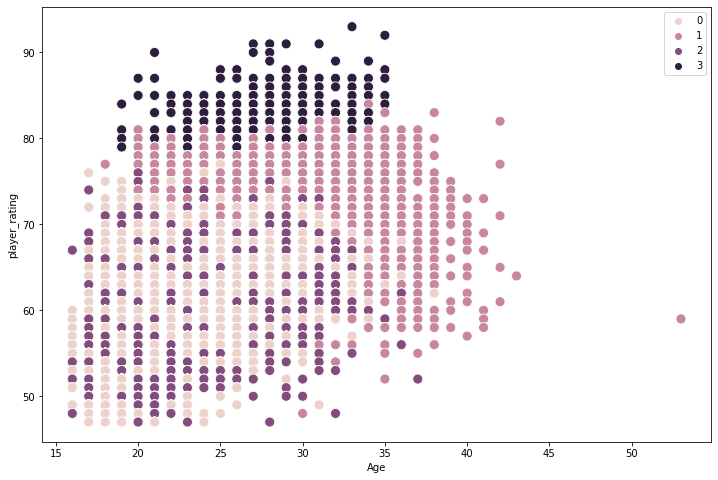

In [58]:
# Plot the clusters for the "Age" and "player_rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=fifa_21_new['Age'], y=fifa_21_new['player_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('player_rating') # Label y-axis.
plt.show()

#### All the clusters colors except black cluster (coded 3) player ratings are below 80, the pink clusters( coded 0) have the oldest players , while the black cluster have the highest ratings

In [57]:
fifa_21_new.loc[fifa_21_new['clusters'] == 3, 'cluster'] = 'black'
fifa_21_new.loc[fifa_21_new['clusters'] == 2, 'cluster'] = 'dark purple'
fifa_21_new.loc[fifa_21_new['clusters'] == 1, 'cluster'] = 'purple'
fifa_21_new.loc[fifa_21_new['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\acisk\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\acisk\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\acisk\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [60]:
fifa_21_new.groupby('cluster').agg({'player_rating':['mean', 'median'], 
                         'Wages EUR':['mean', 'median'], 
                         'Market Value EUR':['mean', 'median'],
                          'Age':['mean', 'median']})

player_rating             Wages EUR        Market Value EUR  \
                     mean median           mean median             mean   
cluster                                                                   
black           82.353211     82  100467.889908  84000     2.650803e+07   
dark purple     62.386796     63    3075.960463   2000     7.713101e+05   
pink            62.611469     63    3259.989267   2000     9.162052e+05   
purple          70.299422     70   12938.959212   7000     3.200204e+06   

                             Age         
               median       mean median  
cluster                                  
black        22000000  26.772936     27  
dark purple    475000  22.874301     23  
pink           500000  22.700705     22  
purple        1500000  29.523988     29